# NBA Playoff Predictor - Data Cleaning

This notebook focuses on cleaning and preprocessing the raw NBA data from Kaggle sources. We'll prepare the data for feature engineering by standardizing formats, handling missing values, and ensuring data quality across different sources.

## Data Sources and Cleaning Goals

1. NBA/ABA/BAA Stats (sumitrodatta)
   - Player Season Info: Contains individual player statistics per season
     - Cleaning focuses on standardizing team names, filtering for NBA-only data, and handling missing values
   - Team Stats Per Game: Contains team-level performance metrics
     - Cleaning involves normalizing team names and ensuring consistent statistical calculations

2. NBA Injury Stats (loganlauton)
   - Contains historical injury data from 1951-2023
   - Cleaning involves:
     - Standardizing injury descriptions
     - Converting dates to consistent format
     - Matching team names with other datasets
     - Removing duplicate entries

3. NBA Shots Data (mexwell)
   - Contains detailed shot location and outcome data
   - Cleaning involves:
     - Standardizing coordinate systems
     - Validating shot types and distances
     - Ensuring consistent player and team naming
     - Removing invalid or incomplete shot records

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from pathlib import Path

sys.path.append('..')

from src.data.cleaners.nba_data_cleaner import NBACleaner
from src.data.utils import setup_logging

logger = setup_logging()

sns.set_theme()

cleaner = NBACleaner()

## Clean NBA/ABA/BBA Stats

## Clean NBA/ABA/BAA Stats

Process data from sumitrodatta's dataset.

The cleaning process ensures consistent formatting and removes any anomalies that could affect our analysis.

# Player Season Data Cleaning Script

This script is designed to clean and standardize NBA player season data for analysis. It performs the following operations:

1. **Load Data**: Reads the raw player season data from a CSV file.
2. **Filter by Season**: Removes records from seasons prior to 2004 to focus on recent data.
3. **Drop Unnecessary Columns**: Eliminates irrelevant columns such as `player_id`, `seas_id`, `birth_year`, `pos`, and `lg` to streamline the dataset.
4. **Standardize Names**:
   - Player names are standardized using `NBACleaner` for consistency.
   - Team names are converted to uppercase, stripped of whitespace, and renamed from `tm` to `team` for clarity.
5. **Convert Columns**:
   - The `age` column is converted to an integer type to ensure proper numeric handling.
   - (Optional) Other numeric columns can be standardized if required.
6. **Validate Data**:
   - Checks for missing values (`NaN`) in all columns and logs detailed information for debugging.
7. **Save Cleaned Data**: Exports the cleaned dataset to a new CSV file for further analysis.

### Output
- A cleaned dataset is saved as `../data/processed/player_season.csv`.
- Logs provide detailed information about the cleaning process, including record counts, transformations, and validation results.

In [21]:
# Load and clean player season info data
logger.info("Loading player season info data...")
ps_df_raw = pd.read_csv('../data/raw/kaggle/sumitrodatta/nba-aba-baa-stats/Player Season Info.csv')
logger.info(f"Initial player season info records: {len(ps_df_raw):,}")

# Make a copy of the raw data for processing
ps_df_processed = ps_df_raw.copy()

# Filter out data before 2004
logger.info("Filtering out records before 2004...")
ps_df_processed = ps_df_processed[ps_df_processed['season'] >= 2004]
logger.info(f"Records after filtering pre-2004 data: {len(ps_df_processed):,}")

# Drop unnecessary columns
columns_to_drop = ['player_id', 'seas_id', 'birth_year', 'pos', 'lg']
logger.info(f"Dropping unnecessary columns: {columns_to_drop}...")
ps_df_processed.drop(columns=columns_to_drop, inplace=True)
logger.info("Unnecessary columns dropped.")

# Standardize player names
logger.info("Standardizing player names...")
ps_df_processed = cleaner.standardize_player_names(ps_df_processed)
logger.info("Player name standardization complete.")

# Standardize team names
logger.info("Standardizing team names: converting to uppercase and stripping whitespace...")
ps_df_processed['tm'] = ps_df_processed['tm'].str.strip().str.upper()
ps_df_processed = cleaner.standardize_team_names(ps_df_processed, ['tm'])
logger.info("Team name standardization complete.")

# Rename 'tm' column to 'team'
logger.info("Renaming 'tm' column to 'team'...")
ps_df_processed.rename(columns={'tm': 'team'}, inplace=True)
logger.info("Column 'tm' successfully renamed to 'team'.")

# Convert 'age' column to integer type
logger.info("Converting 'age' column to integer type...")
ps_df_processed['age'] = pd.to_numeric(ps_df_processed['age'], errors='coerce').fillna(0).astype(int)
logger.info("'age' column conversion to integer complete.")

# Convert numeric columns to appropriate types
logger.info("Converting numeric columns to appropriate data types...")
# Uncomment the next line if numeric column handling is necessary
# ps_df_processed = cleaner.handle_numeric_columns(ps_df_processed)
logger.info("Numeric column conversion complete.")

# Log final record count
logger.info(f"Final cleaned player season info records: {len(ps_df_processed):,}")

# Check for NaN values in any column
logger.info("Checking for NaN values in the dataset...")
nan_cols = ps_df_processed.columns[ps_df_processed.isna().any()].tolist()
if nan_cols:
    logger.warning(f"Found NaN values in the following columns: {nan_cols}")
    for col in nan_cols:
        nan_count = ps_df_processed[col].isna().sum()
        logger.warning(f"Column '{col}' has {nan_count:,} NaN values.")
else:
    logger.info("No NaN values found in the cleaned DataFrame.")

# Display the first 10 rows for validation
logger.info("Displaying the first 10 rows of the cleaned DataFrame...")
print(ps_df_processed.head(10))

# Save the cleaned data to a CSV file
output_path = '../data/processed/player_season.csv'
logger.info(f"Saving cleaned data to {output_path}...")
ps_df_processed.to_csv(output_path, index=False)
logger.info(f"Cleaned data successfully saved to {output_path}.")

# Display the final column names
logger.info("Displaying column names in the cleaned DataFrame...")
print(ps_df_processed.columns.tolist())

2024-12-11 00:54:41 - INFO - Loading player season info data...
2024-12-11 00:54:41 - INFO - Initial player season info records: 32,358
2024-12-11 00:54:41 - INFO - Filtering out records before 2004...
2024-12-11 00:54:41 - INFO - Records after filtering pre-2004 data: 13,629
2024-12-11 00:54:41 - INFO - Dropping unnecessary columns: ['player_id', 'seas_id', 'birth_year', 'pos', 'lg']...
2024-12-11 00:54:41 - INFO - Unnecessary columns dropped.
2024-12-11 00:54:41 - INFO - Standardizing player names...
2024-12-11 00:54:41 - INFO - Player name standardization complete.
2024-12-11 00:54:41 - INFO - Standardizing team names: converting to uppercase and stripping whitespace...
2024-12-11 00:54:41 - INFO - Team name standardization complete.
2024-12-11 00:54:41 - INFO - Renaming 'tm' column to 'team'...
2024-12-11 00:54:41 - INFO - Column 'tm' successfully renamed to 'team'.
2024-12-11 00:54:41 - INFO - Converting 'age' column to integer type...
2024-12-11 00:54:41 - INFO - 'age' column con

       season           player  age team  experience
18729    2004      Aaron McKie   31  PHI          10
18730    2004   Aaron Williams   32  NJN          10
18731    2004     Adonal Foyle   28  GSW           7
18732    2004   Adrian Griffin   29  HOU           5
18733    2004    Al Harrington   23  IND           6
18734    2004   Alan Henderson   31  ATL           9
18735    2004      Alex Garcia   23  SAS           1
18736    2004    Allan Houston   32  NYK          11
18737    2004    Allen Iverson   28  PHI           8
18738    2004  Alonzo Mourning   33  NJN          11
['season', 'player', 'age', 'team', 'experience']


Cleaning results for Player Season data 

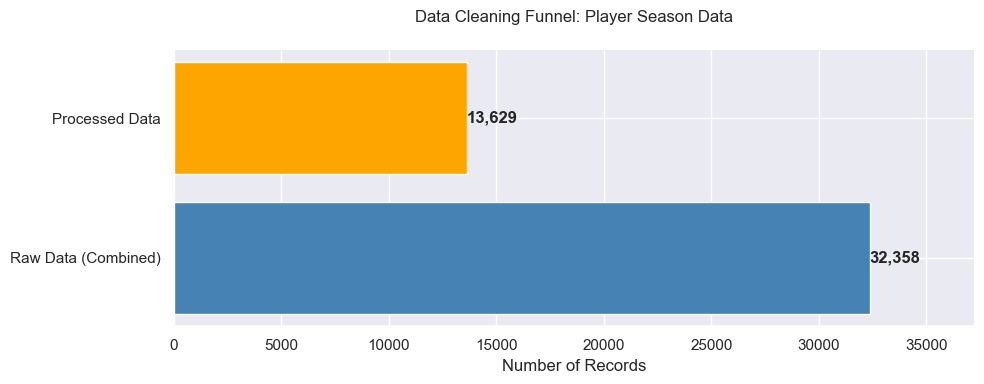

In [22]:
# Data for Player Season Data
dataset_name = "Player Season Data"
raw_count = len(ps_df_raw)  
processed_count = len(ps_df_processed) 

# Data for plotting
stages = ['Raw Data (Combined)', 'Processed Data']
counts = [raw_count, processed_count]
colors = ['steelblue', 'orange']

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Create horizontal bars
bars = ax.barh(stages, counts, color=colors)

# Add value labels on the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2,
            f'{int(width):,}',
            ha='left', va='center', fontweight='bold')

# Customize the chart
ax.set_title(f'Data Cleaning Funnel: {dataset_name}', pad=20)
ax.set_xlabel('Number of Records')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add some padding to x-axis for label visibility
ax.set_xlim(0, max(counts) * 1.15)

plt.tight_layout()
plt.show()

# Team Statistics Data Cleaning Script

This script processes and cleans NBA team statistics data for analysis. It performs the following steps:

1. **Load Data**: Reads the raw team statistics data from a CSV file.
2. **Filter by Season**: Removes records for seasons prior to 2004, focusing on modern basketball data.
3. **Remove League Averages**: Excludes entries labeled as "League Average" to ensure team-specific analysis.
4. **Standardize Team Names**:
   - Converts team names to uppercase.
   - Strips unnecessary whitespace.
   - Uses `BaseNBACleaner` to map team names to standardized three-letter codes.
5. **Convert Columns**:
   - Converts numeric columns to the appropriate data types.
   - Transforms percentage values (e.g., "45.6%") into decimal form (e.g., `0.456`) for easier calculations.
6. **Validate Data**:
   - Checks for missing values (`NaN`) in all columns and logs detailed warnings for any issues.
7. **Save Cleaned Data**: Exports the cleaned dataset to a CSV file for further analysis or modeling.

### Output
- The cleaned dataset is saved as `../data/processed/team_stats.csv`.
- Detailed logs capture every step of the cleaning process, including record counts, transformations, and validation results.

### Benefits
- Ensures consistent formatting and structure across all team data.
- Prepares the data for advanced analytics by eliminating non-relevant entries and handling numeric conversions.


In [23]:
# Load and clean team stats data
logger.info("Loading team stats data...")
ts_df_raw = pd.read_csv('../data/raw/kaggle/sumitrodatta/nba-aba-baa-stats/Team Stats Per Game.csv')
logger.info(f"Initial team stats records: {len(ts_df_raw):,}")

# Make a copy of the raw data for processing
ts_df_processed = ts_df_raw.copy()

# Filter out data before 2004
logger.info("Filtering out records before 2004...")
ts_df_processed = ts_df_processed[ts_df_processed['season'] >= 2004]
logger.info(f"Records after filtering pre-2004 data: {len(ts_df_processed):,}")

# Remove League Average entries
logger.info("Removing 'League Average' entries from the data...")
ts_df_processed = ts_df_processed[~ts_df_processed['team'].str.contains('League Average', case=False, na=False)]
logger.info(f"Records after removing 'League Average' entries: {len(ts_df_processed):,}")

# Standardize team names
logger.info("Standardizing team names: converting to uppercase and stripping whitespace...")
ts_df_processed['team'] = ts_df_processed['team'].str.strip().str.upper()
ts_df_processed = cleaner.standardize_team_names(ts_df_processed, ['team'])
logger.info("Team name standardization complete.")

# Convert numeric columns to appropriate types
logger.info("Converting numeric columns to appropriate data types...")
# Uncomment the line below if numeric column handling is needed
# ts_df_processed = cleaner.handle_numeric_columns(ts_df_processed)
logger.info("Numeric column conversion complete.")

# Convert percentage strings to decimals
logger.info("Converting percentage strings to decimal values...")
ts_df_processed = cleaner.convert_percentages(ts_df_processed)
logger.info("Percentage conversion complete.")

# Log final record count
logger.info(f"Final cleaned team statistics records: {len(ts_df_processed):,}")

# Check for NaN values in any column
logger.info("Checking for NaN values in the dataset...")
nan_cols = ts_df_processed.columns[ts_df_processed.isna().any()].tolist()
if nan_cols:
    logger.warning(f"Found NaN values in the following columns: {nan_cols}")
    for col in nan_cols:
        nan_count = ts_df_processed[col].isna().sum()
        logger.warning(f"Column '{col}' has {nan_count:,} NaN values.")
else:
    logger.info("No NaN values found in the cleaned DataFrame.")

# Display the first 10 rows for validation
logger.info("Displaying the first 10 rows of the cleaned DataFrame...")
print(ts_df_processed.head(10))

# Save the cleaned data to a CSV file
output_path = '../data/processed/team_stats.csv'
logger.info(f"Saving cleaned data to {output_path}...")
ts_df_processed.to_csv(output_path, index=False)
logger.info(f"Cleaned data successfully saved to {output_path}.")


2024-12-11 00:54:42 - INFO - Loading team stats data...
2024-12-11 00:54:42 - INFO - Initial team stats records: 1,876
2024-12-11 00:54:42 - INFO - Filtering out records before 2004...
2024-12-11 00:54:42 - INFO - Records after filtering pre-2004 data: 681
2024-12-11 00:54:42 - INFO - Removing 'League Average' entries from the data...
2024-12-11 00:54:42 - INFO - Records after removing 'League Average' entries: 659
2024-12-11 00:54:42 - INFO - Standardizing team names: converting to uppercase and stripping whitespace...
2024-12-11 00:54:42 - INFO - Team name standardization complete.
2024-12-11 00:54:42 - INFO - Converting numeric columns to appropriate data types...
2024-12-11 00:54:42 - INFO - Numeric column conversion complete.
2024-12-11 00:54:42 - INFO - Converting percentage strings to decimal values...
2024-12-11 00:54:42 - INFO - Percentage conversion complete.
2024-12-11 00:54:42 - INFO - Final cleaned team statistics records: 659
2024-12-11 00:54:42 - INFO - Checking for NaN 

   season   lg team abbreviation  playoffs     g  mp_per_game  fg_per_game  \
0    2025  NBA  ATL          ATL     False  21.0        240.0         42.4   
1    2025  NBA  BOS          BOS     False  19.0        243.9         41.8   
2    2025  NBA  BKN          BRK     False  20.0        242.5         39.4   
3    2025  NBA  CHI          CHI     False  21.0        240.0         43.1   
4    2025  NBA  CHA          CHO     False  20.0        242.5         38.6   
5    2025  NBA  CLE          CLE     False  20.0        240.0         45.6   
6    2025  NBA  DAL          DAL     False  20.0        241.3         43.7   
7    2025  NBA  DEN          DEN     False  17.0        242.9         42.9   
8    2025  NBA  DET          DET     False  22.0        243.4         40.4   
9    2025  NBA  GSW          GSW     False  19.0        241.3         42.5   

   fga_per_game  fg_percent  ...  ft_percent  orb_per_game  drb_per_game  \
0          91.5       0.463  ...       0.783          12.3       

Cleaning results for Team Statistics Data

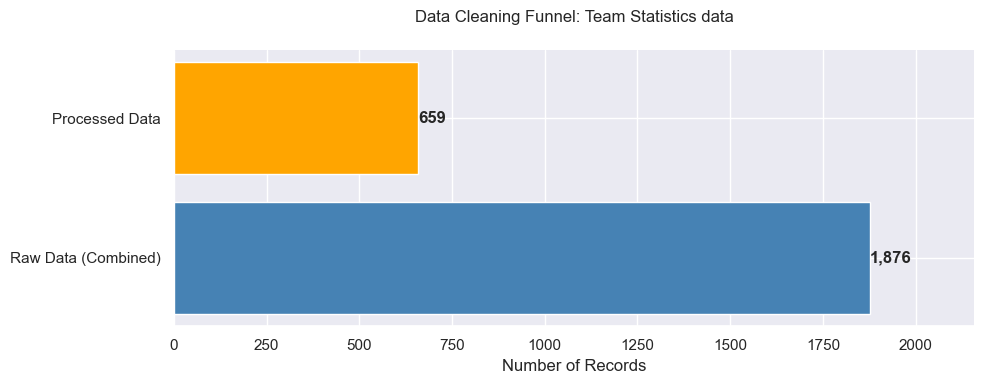

In [24]:
# Data for Team Statistics data
dataset_name = "Team Statistics data"
raw_count = len(ts_df_raw)  # Replace with the actual variable for raw data count
processed_count = len(ts_df_processed)  # Replace with the actual variable for processed data count

# Data for plotting
stages = ['Raw Data (Combined)', 'Processed Data']
counts = [raw_count, processed_count]
colors = ['steelblue', 'orange']

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Create horizontal bars
bars = ax.barh(stages, counts, color=colors)

# Add value labels on the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2,
            f'{int(width):,}',
            ha='left', va='center', fontweight='bold')

# Customize the chart
ax.set_title(f'Data Cleaning Funnel: {dataset_name}', pad=20)
ax.set_xlabel('Number of Records')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add some padding to x-axis for label visibility
ax.set_xlim(0, max(counts) * 1.15)

plt.tight_layout()
plt.show()

# Injury Data Cleaning and Summary Script

This script processes NBA player injury data to clean and standardize it while summarizing the number of injuries per team per season. Additionally, it ensures consistency in column naming conventions by converting column names to lowercase.

## Key Steps:

1. **Load Data**:
   - Reads raw injury data from a CSV file.
   - Logs the initial number of records for traceability.

2. **Data Cleaning**:
   - Converts `Date` to a datetime format for proper filtering and analysis.
   - Filters out records before 2004 to focus on modern data.
   - Drops unnecessary columns: `['Unnamed: 0', 'Acquired', 'Relinquished', 'Notes']`.

3. **Team Name Standardization**:
   - Strips whitespace and converts team names to uppercase.
   - Maps team names to standardized three-letter codes using `BaseNBACleaner`.

4. **Validation**:
   - Checks for missing values (`NaN`) in all columns.
   - Logs details of any missing data for debugging.

5. **Injury Summary**:
   - Extracts the `Year` from the `Date` column for grouping.
   - Groups the data by `Year` and `Team` and counts the number of injuries for each combination.

6. **Column Name Standardization**:
   - Converts all column names to lowercase for consistency and ease of integration with other processes.

7. **Save Processed Data**:
   - Exports the cleaned data and the summarized injury counts to separate CSV files:
     - Cleaned data: `../data/processed/injuries.csv`
     - Injury summary: `../data/processed/injury_summary.csv`

8. **Validation Outputs**:
   - Displays the first 10 rows of both the cleaned data and the summary data for validation.

## Outputs:

### Cleaned Data (Lowercase Column Names):
Example of cleaned data:
```plaintext
          date     team
6282 2004-01-02      MIA
6283 2004-01-02      MIA
6284 2004-01-02      DAL
6285 2004-01-02      GSW
6286 2004-01-04      LAL
6287 2004-01-04      LAL


In [25]:
# Load and preserve original injury data
logger.info("Loading player injury data...")
injury_df_raw = pd.read_csv('../data/raw/kaggle/loganlauton/nba-injury-stats-1951-2023/NBA Player Injury Stats(1951 - 2023).csv')
logger.info(f"Initial player injury records: {len(injury_df_raw):,}")

# Make a copy of the raw data for processing
injury_df_processed = injury_df_raw.copy()

# Convert dates to datetime
logger.info("Converting 'Date' column to datetime format...")
injury_df_processed = cleaner.handle_dates(injury_df_processed, ['Date'])
logger.info("Date conversion complete.")

# Filter out data before 2004
logger.info("Filtering out records before 2004...")
injury_df_processed = injury_df_processed[injury_df_processed['Date'] >= '2004-01-01']
logger.info(f"Records after filtering pre-2004 data: {len(injury_df_processed):,}")

# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0', 'Acquired', 'Relinquished', 'Notes']
logger.info(f"Dropping unnecessary columns: {columns_to_drop}...")
injury_df_processed.drop(columns=columns_to_drop, inplace=True)
logger.info("Unnecessary columns dropped.")

# Standardize team names
logger.info("Standardizing team names: converting to uppercase, stripping whitespace, and mapping to three-letter codes...")
injury_df_processed['Team'] = injury_df_processed['Team'].str.strip().str.upper()
injury_df_processed = cleaner.standardize_team_names(injury_df_processed, ['Team'])
logger.info("Team name standardization complete.")

# Log final record count
logger.info(f"Final cleaned player injury records: {len(injury_df_processed):,}")

# Check for NaN values in any column
logger.info("Checking for NaN values in the dataset...")
nan_cols = injury_df_processed.columns[injury_df_processed.isna().any()].tolist()
if nan_cols:
    logger.warning(f"Found NaN values in the following columns: {nan_cols}")
    for col in nan_cols:
        nan_count = injury_df_processed[col].isna().sum()
        logger.warning(f"Column '{col}' has {nan_count:,} NaN values.")
else:
    logger.info("No NaN values found in the cleaned DataFrame.")

# Display the first 10 rows for validation
logger.info("Displaying the first 10 rows of the cleaned DataFrame...")
print(injury_df_processed.head(10))

# Calculate injuries per year per team
logger.info("Extracting 'Year' from the 'Date' column...")
injury_df_processed['Year'] = injury_df_processed['Date'].dt.year
logger.info("'Year' extraction complete.")

logger.info("Grouping data by 'Year' and 'Team' and counting occurrences...")
injury_summary_df = injury_df_processed.groupby(['Year', 'Team']).size().reset_index(name='Count')

# Standardize column names to lowercase
logger.info("Converting summary DataFrame column names to lowercase...")
injury_summary_df.columns = injury_summary_df.columns.str.lower()
logger.info("Column name conversion complete.")

# Display the first 10 rows of the summary DataFrame
logger.info("Displaying the first 10 rows of the grouped injury summary...")
print(injury_summary_df.head(10))

# Save the processed data and summary data to CSV files
output_processed_path = '../data/processed/injuries.csv'
output_summary_path = '../data/processed/injuries_summary.csv'

logger.info(f"Saving cleaned injury data to {output_processed_path}...")
injury_df_processed.to_csv(output_processed_path, index=False)
logger.info(f"Cleaned injury data successfully saved to {output_processed_path}.")

logger.info(f"Saving summarized injury data to {output_summary_path}...")
injury_summary_df.to_csv(output_summary_path, index=False)
logger.info(f"Summarized injury data successfully saved to {output_summary_path}.")


2024-12-11 00:54:42 - INFO - Loading player injury data...
2024-12-11 00:54:42 - INFO - Initial player injury records: 37,667
2024-12-11 00:54:42 - INFO - Converting 'Date' column to datetime format...
2024-12-11 00:54:42 - INFO - Date conversion complete.
2024-12-11 00:54:42 - INFO - Filtering out records before 2004...
2024-12-11 00:54:42 - INFO - Records after filtering pre-2004 data: 31,385
2024-12-11 00:54:42 - INFO - Dropping unnecessary columns: ['Unnamed: 0', 'Acquired', 'Relinquished', 'Notes']...
2024-12-11 00:54:42 - INFO - Unnecessary columns dropped.
2024-12-11 00:54:42 - INFO - Standardizing team names: converting to uppercase, stripping whitespace, and mapping to three-letter codes...
2024-12-11 00:54:42 - INFO - Team name standardization complete.
2024-12-11 00:54:42 - INFO - Final cleaned player injury records: 31,385
2024-12-11 00:54:42 - INFO - Checking for NaN values in the dataset...
2024-12-11 00:54:42 - INFO - No NaN values found in the cleaned DataFrame.
2024-12

           Date Team
6282 2004-01-02  MIA
6283 2004-01-02  MIA
6284 2004-01-02  DAL
6285 2004-01-02  GSW
6286 2004-01-04  LAL
6287 2004-01-04  LAL
6288 2004-01-05  POR
6289 2004-01-05  UTA
6290 2004-01-05  SAS
6291 2004-01-05  SAS
   year     team  count
0  2004      ATL     20
1  2004      BKN     21
2  2004  BOBCATS     15
3  2004      BOS     16
4  2004      CHA     21
5  2004      CHI     25
6  2004      CLE     41
7  2004      DAL     17
8  2004      DEN     22
9  2004      DET     19


Cleaning results for Player Injury data

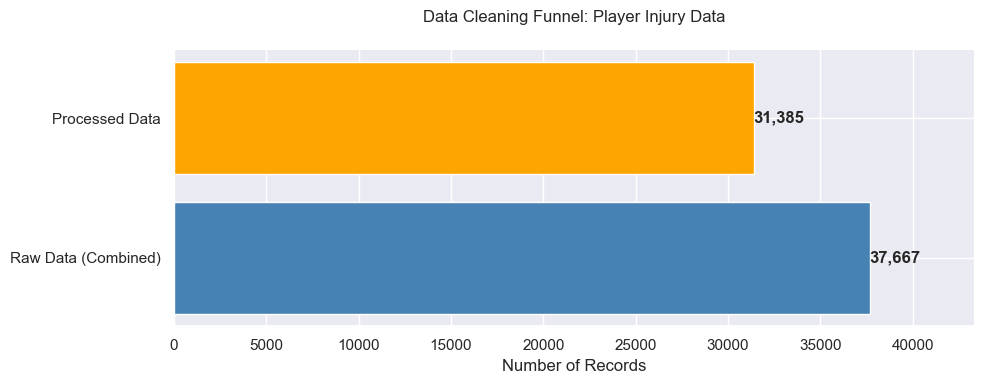

In [26]:
# Data for Player Injury Data
dataset_name = "Player Injury Data"
raw_count = len(injury_df_raw)  
processed_count = len(injury_df_processed) 

# Data for plotting
stages = ['Raw Data (Combined)', 'Processed Data']
counts = [raw_count, processed_count]
colors = ['steelblue', 'orange']

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Create horizontal bars
bars = ax.barh(stages, counts, color=colors)

# Add value labels on the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2,
            f'{int(width):,}',
            ha='left', va='center', fontweight='bold')

# Customize the chart
ax.set_title(f'Data Cleaning Funnel: {dataset_name}', pad=20)
ax.set_xlabel('Number of Records')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add some padding to x-axis for label visibility
ax.set_xlim(0, max(counts) * 1.15)

plt.tight_layout()
plt.show()

# Shots Data Cleaning Script

This script processes and cleans NBA shot data from multiple CSV files and combines them into a single standardized dataset. It ensures consistency, resolves missing values, and prepares the data for analysis or modeling.

## Key Steps:

1. **Directory Validation**:
   - Verifies the existence of the shots data directory.
   - Searches for files matching the pattern `NBA_20[0-9][0-9]_Shots.csv`.
   - Logs detailed information about found files or raises an error if no files are found.

2. **File Loading**:
   - Reads each file into a pandas DataFrame.
   - Tracks and logs the number of records loaded from each file.
   - Appends each DataFrame into a list for further processing.

3. **Data Combination**:
   - Concatenates all individual DataFrames into a single DataFrame for analysis.
   - Logs the total number of records combined.

4. **Data Cleaning**:
   - **Standardize Team Names**:
     - Strips whitespace, converts names to uppercase, and maps them to standardized three-letter codes.
     - Applies transformations to `TEAM_NAME`, `HOME_TEAM`, and `AWAY_TEAM` columns.
   - **Standardize Player Names**:
     - Ensures consistent formatting of player names using `BaseNBACleaner`.
   - **Numeric Column Conversion**:
     - Converts numeric columns to appropriate types for better usability.
   - **Handle Missing Values**:
     - Fills missing values in `POSITION` and `POSITION_GROUP` columns with `'UNKNOWN'`.

5. **Validation**:
   - Logs the shape and column types of the DataFrame.
   - Checks for missing values (`NaN`) across all columns and logs detailed warnings if any are found.

6. **Save Processed Data**:
   - Exports the cleaned and combined dataset to a single CSV file at `../data/processed/shots.csv`.

## Outputs:

### Cleaned Data:
Example of the cleaned DataFrame:
```plaintext
     TEAM_NAME HOME_TEAM AWAY_TEAM PLAYER_NAME POSITION POSITION_GROUP SHOT_TYPE
0         LAL       LAL       MIA      Player1  GUARD         BACKCOURT      JUMP
1         MIA       LAL       MIA      Player2  CENTER        FRONTCOURT      JUMP


In [27]:
logger.info("Starting shots data cleaning process...")
shots_dir = Path('../data/raw/kaggle/mexwell/nba-shots')

# Log the directory being used
logger.info(f"Looking for shot files in: {shots_dir.absolute()}")

shots_data = []

try:
    # Validate shots directory
    logger.info("Validating the shots directory...")
    if not shots_dir.exists():
        raise FileNotFoundError(f"Directory not found: {shots_dir}")

    # Search for shot files
    logger.info("Searching for shot files...")
    shots_files = sorted(shots_dir.glob('NBA_20[0-9][0-9]_Shots.csv'))
    if not shots_files:
        raise FileNotFoundError(f"No shot files found in {shots_dir}")

    logger.info(f"Found {len(shots_files)} shot files:")
    for file in shots_files:
        logger.info(f"- {file.name}")

    # Load and process each file
    total_rows = 0
    for file in shots_files:
        logger.info(f"Loading {file.name}...")
        df = pd.read_csv(file)
        total_rows += len(df)
        logger.info(f"Loaded {len(df):,} records from {file.name}")
        shots_data.append(df)

    # Combine all shot files into a single DataFrame
    logger.info("Combining all shot data into a single DataFrame...")
    shots_df_raw = pd.concat(shots_data, ignore_index=True)
    logger.info(f"Successfully combined {len(shots_df):,} total records.")

    # Preserve the combined raw DataFrame
    logger.info("Preserving the combined raw DataFrame for reference...")
    shots_df_processed = shots_df_raw.copy()

    # Initial data overview
    logger.info("Initial data overview:")
    logger.info(f"Shape: {shots_df_processed.shape}")
    logger.info("Column types:")
    logger.info(shots_df_processed.dtypes)

    # Standardize column headers to lowercase
    logger.info("Standardizing column headers to lowercase...")
    shots_df_processed.columns = shots_df_processed.columns.str.lower()
    logger.info("Column headers standardized.")

    # Rename 'season_1' to 'season' and drop 'season_2'
    logger.info("Renaming 'season_1' to 'season' and dropping 'season_2'...")
    shots_df_processed.rename(columns={'season_1': 'season'}, inplace=True)
    shots_df_processed.drop(columns=['season_2'], inplace=True)
    logger.info("'season_1' renamed and 'season_2' dropped.")

    # Drop 'team_id' and 'player_id'
    logger.info("Dropping 'team_id' and 'player_id' columns...")
    shots_df_processed.drop(columns=['team_id', 'player_id'], inplace=True)
    logger.info("'team_id' and 'player_id' columns dropped.")

    # Standardize team names
    logger.info("Standardizing team names...")
    team_columns = ['team', 'home_team', 'away_team']
    for col in team_columns:
        if col in shots_df_processed.columns:
            shots_df_processed[col] = shots_df_processed[col].str.strip().str.upper()
    shots_df_processed = cleaner.standardize_team_names(shots_df_processed, team_columns)
    logger.info("Team names standardized.")

    # Standardize player names
    logger.info("Standardizing player names...")
    shots_df_processed = cleaner.standardize_player_names(shots_df_processed, 'player_name')
    logger.info("Player names standardized.")

    # Convert numeric columns to appropriate types
    logger.info("Converting numeric columns to appropriate data types...")
    shots_df_processed = cleaner.handle_numeric_columns(shots_df_processed)
    logger.info("Numeric column conversion complete.")

    # Fill missing values in specific columns
    logger.info("Filling missing values in 'position' and 'position_group' columns if present...")
    if 'position' in shots_df_processed.columns:
        shots_df_processed['position'] = shots_df_processed['position'].fillna('UNKNOWN')
    if 'position_group' in shots_df_processed.columns:
        shots_df_processed['position_group'] = shots_df_processed['position_group'].fillna('UNKNOWN')

    # Cleaning summary
    logger.info("Cleaning summary:")
    logger.info(f"Original records: {total_rows:,}")
    logger.info(f"Cleaned records: {len(shots_df_processed):,}")
    logger.info(f"Records removed during cleaning: {total_rows - len(shots_df_processed):,}")

    # Check for NaN values
    logger.info("Checking for NaN values in the dataset...")
    nan_cols = shots_df_processed.columns[shots_df_processed.isna().any()].tolist()
    if nan_cols:
        logger.warning(f"Found NaN values in the following columns: {nan_cols}")
        for col in nan_cols:
            nan_count = shots_df_processed[col].isna().sum()
            logger.warning(f"Column '{col}' has {nan_count:,} NaN values.")
    else:
        logger.info("No NaN values found in the cleaned DataFrame.")

except Exception as e:
    logger.error(f"Error processing shots data: {str(e)}")
    raise

# Display the first 10 rows of the cleaned DataFrame
logger.info("Displaying the first 10 rows of the cleaned DataFrame...")
print(shots_df_processed.head(10))

# Save the raw and cleaned DataFrames to separate CSV files
cleaned_output_path = '../data/processed/shots.csv'

logger.info(f"Saving cleaned shots data to {cleaned_output_path}...")
shots_df_processed.to_csv(cleaned_output_path, index=False)
logger.info(f"Cleaned shots data successfully saved to {cleaned_output_path}.")


2024-12-11 00:54:43 - INFO - Starting shots data cleaning process...


2024-12-11 00:54:43 - INFO - Looking for shot files in: /Users/luke/src/github.com/lukelittle/csca5622-final-project/notebooks/../data/raw/kaggle/mexwell/nba-shots
2024-12-11 00:54:43 - INFO - Validating the shots directory...
2024-12-11 00:54:43 - INFO - Searching for shot files...
2024-12-11 00:54:43 - INFO - Found 21 shot files:
2024-12-11 00:54:43 - INFO - - NBA_2004_Shots.csv
2024-12-11 00:54:43 - INFO - - NBA_2005_Shots.csv
2024-12-11 00:54:43 - INFO - - NBA_2006_Shots.csv
2024-12-11 00:54:43 - INFO - - NBA_2007_Shots.csv
2024-12-11 00:54:43 - INFO - - NBA_2008_Shots.csv
2024-12-11 00:54:43 - INFO - - NBA_2009_Shots.csv
2024-12-11 00:54:43 - INFO - - NBA_2010_Shots.csv
2024-12-11 00:54:43 - INFO - - NBA_2011_Shots.csv
2024-12-11 00:54:43 - INFO - - NBA_2012_Shots.csv
2024-12-11 00:54:43 - INFO - - NBA_2013_Shots.csv
2024-12-11 00:54:43 - INFO - - NBA_2014_Shots.csv
2024-12-11 00:54:43 - INFO - - NBA_2015_Shots.csv
2024-12-11 00:54:43 - INFO - - NBA_2016_Shots.csv
2024-12-11 00:54

   season               team_name       player_name position_group position  \
0    2004      Los Angeles Lakers       KOBE BRYANT              G       SG   
1    2004  Portland Trail Blazers  DAMON STOUDAMIRE              G       PG   
2    2004      Los Angeles Lakers       KOBE BRYANT              G       SG   
3    2004  Portland Trail Blazers  DAMON STOUDAMIRE              G       PG   
4    2004  Portland Trail Blazers  DAMON STOUDAMIRE              G       PG   
5    2004      Los Angeles Lakers        BRIAN COOK              C        C   
6    2004  Portland Trail Blazers  DAMON STOUDAMIRE              G       PG   
7    2004      Los Angeles Lakers       KOBE BRYANT              G       SG   
8    2004           Atlanta Hawks    CHRIS CRAWFORD              F       PF   
9    2004      Los Angeles Lakers       KOBE BRYANT              G       SG   

    game_date   game_id home_team away_team  event_type  ...  basic_zone  \
0  04-14-2004  20301187       POR       LAL         0.

2024-12-11 00:56:09 - INFO - Cleaned shots data successfully saved to ../data/processed/shots.csv.


Cleaning results for Shots data

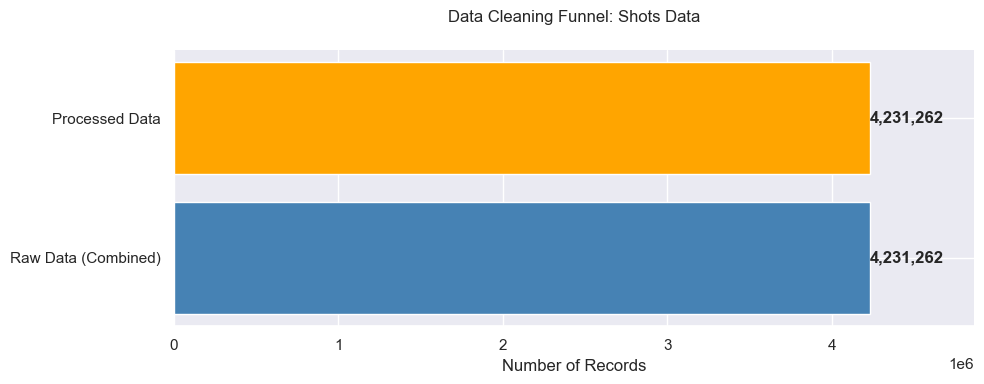

In [28]:

dataset_name = "Shots Data"
raw_count = len(shots_df_raw) 
processed_count = len(shots_df_processed)  

# Data for plotting
stages = ['Raw Data (Combined)', 'Processed Data']
counts = [raw_count, processed_count]
colors = ['steelblue', 'orange']

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Create horizontal bars
bars = ax.barh(stages, counts, color=colors)

# Add value labels on the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2,
            f'{int(width):,}',
            ha='left', va='center', fontweight='bold')

# Customize the chart
ax.set_title(f'Data Cleaning Funnel: {dataset_name}', pad=20)
ax.set_xlabel('Number of Records')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add some padding to x-axis for label visibility
ax.set_xlim(0, max(counts) * 1.15)

plt.tight_layout()
plt.show()